The following defines the PDE, by way of a function for $\mathbf{f}(\mathbf{u})$ and its derivative (Jacobian matrix), and a function for the Dirichlet boundary condition.

In [1]:
using SparseArrays
 
pde = function pde(U,X,Y,d)
    LU = d.Dxx*U + U*d.Dyy'      # apply Laplacian
    Ux = d.Dx*U
    F = @. 1 - Ux + 0.05*LU      # residual

    L = kron(d.Dyy,d.Ix) + kron(d.Iy,d.Dxx)
    u = d.vec(U)
    J = -kron(d.Iy,d.Dx) + 0.05*L  # Jacobian
    return F,J
end

g(x,y) = 0;    # boundary condition

In [2]:
include("../FNC.jl")
U,X,Y = FNC.newtonpde(pde,g,100,[-1,1],100,[-1,1]);

Norm of residual = 45.002490486646415
Norm of residual = 7.408789100921004
Norm of residual = 0.239318477634345
Norm of residual = 0.0013257691297362867
Norm of residual = 1.2298887037501507e-6
Norm of residual = 1.903484749665377e-10
Norm of residual = 4.091131261566019e-12


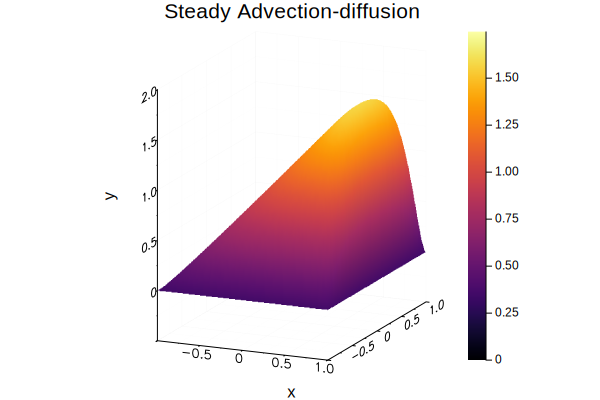

In [3]:
using Plots
surface(X[:,1],Y[1,:],U',xlabel="x",ylabel="y",
    title="Steady Advection-diffusion")